Αρχικά επειδή τα εργαλεία που θα χρησιμοποιήσουμε ειναι case sensitive θα μετατρέψουμε το training set μας σε lowercase

In [1]:
with open('../twitter_data/train2017.tsv', 'r', encoding="utf8") as fileInput:
#with open('test.tsv', 'r', encoding="utf8") as fileInput:
    text = ''
    for line in fileInput:
        line = line.lower()
        text += line
    #print(text)


Aφαίρεση των URL

In [2]:
import re
text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', ' ! ', text)
text = text.replace('can\'t',' cant ')
text = text.replace(' u ', ' you ')

Σπάσιμο κειμένου σε tweet για να επεξεργαστούμε το καθένα ξεχωριστά

In [3]:
tweetList = text.splitlines()
#print(tweetList)

Σπάσιμο tweet σε λέξεις

In [4]:
from nltk import word_tokenize
tokenedTweetList = []
for tweet in tweetList:
    tokenedTweetList.append(word_tokenize(tweet))
#print(tokenedTweetList)

Αφαίρεση των tags

In [5]:
for tweet in tokenedTweetList:
    for word in tweet:
        if word == '@':
            tweet.remove(tweet[tweet.index(word)+1])
            tweet.remove(tweet[tweet.index(word)])
#print(tokenedTweetList)

Καθάρισμα σημείων στήξεως

In [6]:
from string import punctuation
clearedTweetList = []
for tweet in tokenedTweetList:
    for word in tweet:
        tokenedTweetList[tokenedTweetList.index(tweet)][tweet.index(word)] = word.strip(punctuation)
#print(tokenedTweetList)


Καθάρισμα απο stopwords και κενα tokens

In [7]:
from nltk.corpus import stopwords

cleanedTweetList = []

for tweet in tokenedTweetList:
    cleanedTweet = []
    for word in tweet:
        if word not in stopwords.words('english') and word != '':
            cleanedTweet.append(word);
    cleanedTweetList.append(cleanedTweet)
#print(cleanedTweetList)

In [8]:
file = open('filteredTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    for word in tweet:
        file.write(word + ' ')
    file.write('\n')
file.close()

Θα διαχωρήσουμε τα positive/negative/neutral tweets σε διαφορετικά αρχεία για μα διευκολήνουμε την επεξεργασία τους

In [9]:
file = open('positiveTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'positive':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('negativeTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'negative':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('neutralTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()


Lemmatized εκδοσεις των παραπάνων αρχείων που θα χρησιμοποιηθούν για ακριβέστερα αποτελέσματα στα dataframes/WordClouds

In [10]:

from nltk.stem import  WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_output = []
for tweet in cleanedTweetList:
    lemmatized_output.append([lemmatizer.lemmatize(word) for word in tweet])


file = open('lemmatizedPositiveTweets.tsv', 'w', encoding="utf8")

for tweet in lemmatized_output:
    if tweet[2] == 'positive':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('lemmatizedNegativeTweets.tsv', 'w', encoding="utf8")

for tweet in lemmatized_output:
    if tweet[2] == 'negative':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('lemmatizedNeutralTweets.tsv', 'w', encoding="utf8")

for tweet in lemmatized_output:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

 Οι 50 πιο συχνά χρησιμοποιημένες λέξεις στα θετικά tweets

In [11]:
from collections import Counter
import pandas as pd 
from nltk import word_tokenize

with open('lemmatizedPositiveTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

positiveTweetList = []
for tweet in tweetList:
    positiveTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in positiveTweetList:
    count +=  Counter(tweet)
    
dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])
dataFrame

,Word,Count
0,tomorrow,2125
1,day,1246
2,may,1186
3,see,930
4,night,925
5,good,851
6,going,832
7,time,717
8,friday,687
9,get,668


Για την δημιουργία του Word Cloud θα χρησιμοποιησουμε το παρακάτω πακέτο(https://anaconda.org/conda-forge/wordcloud)

Oι 50 πιο συχνά χρησιμοποιημένες λέξεις για τα αρνητικά tweets

In [12]:
from collections import Counter

with open('lemmatizedNegativeTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

negativeTweetList = []
for tweet in tweetList:
    negativeTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in negativeTweetList:
    count +=  Counter(tweet)
    
dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])
dataFrame

,Word,Count
0,may,650
1,tomorrow,625
2,n't,579
3,like,352
4,day,320
5,going,320
6,go,286
7,get,279
8,time,261
9,1st,258


Οι 50 πιο συχνά χρησιμοποιημένες λέξεις για τα ουδέτερα tweets

In [13]:
from collections import Counter

with open('lemmatizedNeutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

neutralTweetList = []
for tweet in tweetList:
    neutralTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in neutralTweetList:
    count +=  Counter(tweet)

dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])
dataFrame

,Word,Count
0,tomorrow,1683
1,may,1155
2,going,933
3,day,896
4,night,745
5,go,720
6,time,702
7,game,658
8,saturday,656
9,friday,637


    Positive Tweets Word Cloud

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk import word_tokenize

positiveText = ''
for tweet in positiveTweetList:
    for word in tweet:
        positiveText = positiveText + word + ' '

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 14).generate(positiveText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<Figure size 800x800 with 1 Axes>

    Negative Tweets Word Cloud

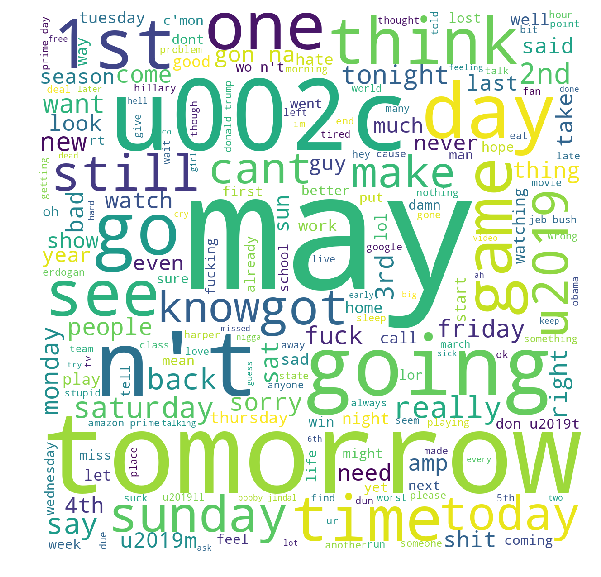

In [16]:
negativeText = ''
for tweet in negativeTweetList:
    for word in tweet:
        negativeText = negativeText + word + ' '

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 14).generate(negativeText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

    Neutral Tweets Word Cloud

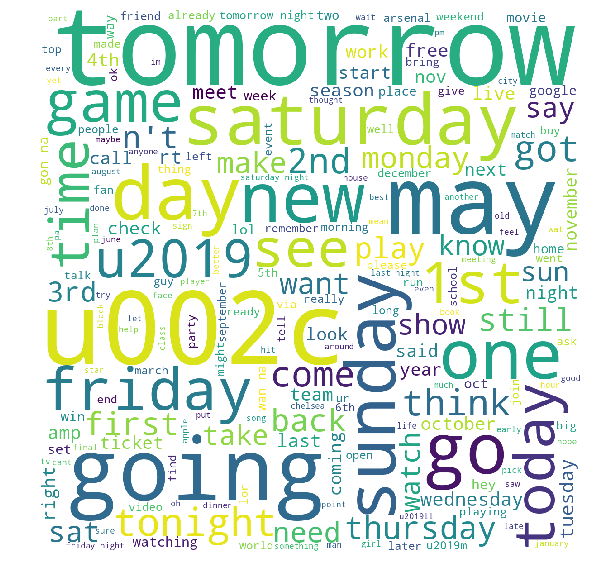

In [17]:
neutralText = ''
for tweet in neutralTweetList:
    for word in tweet:
        neutralText = neutralText + word + ' '

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 14).generate(neutralText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Stemmed εκδοση των positive/negative/neutral files 

In [18]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweetList = []
for tokens in cleanedTweetList:
    stemmedTweetList.append([stemmer.stem(token) for token in tokens ])
    
file = open('stemmedPositiveTweets.tsv', 'w', encoding="utf8")

for tweet in stemmedTweetList:
    if tweet[2] == 'positive':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('stemmedNegativeTweets.tsv', 'w', encoding="utf8")

for tweet in stemmedTweetList:
    if tweet[2] == 'negative':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('stemmedNeutralTweets.tsv', 'w', encoding="utf8")

for tweet in stemmedTweetList:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()


Δημιουργία Bag-of-word και αποθήκευση σε csv

In [46]:
with open('lemmatizedNeutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

'''
max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".
The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms
min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents"
The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.
'''
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 200,stop_words='english',max_df=0.5,min_df=0.01)

vectorizedTweetList = vectorizer.fit_transform(tweetList)
print(vectorizer.get_feature_names())

import pandas as pd

df = pd.DataFrame(data = vectorizedTweetList.toarray(), columns = vectorizer.get_feature_names())
df.to_csv('neutralBagOfWords.csv',index=False)
df

['10', '12', '1st', '2012', '2nd', '30', '3rd', '4th', '5th', 'amp', 'apple', 'big', 'black', 'buy', 'check', 'city', 'come', 'coming', 'david', 'day', 'end', 'event', 'free', 'friday', 'game', 'going', 'gon', 'google', 'got', 'guy', 'hey', 'home', 'house', 'january', 'know', 'let', 'like', 'live', 'lol', 'look', 'lor', 'make', 'march', 'meet', 'monday', 'morning', 'movie', 'na', 'need', 'new', 'news', 'night', 'nov', 'november', 'oct', 'october', 'open', 'party', 'place', 'play', 'right', 'rt', 'said', 'sat', 'saturday', 'say', 'school', 'season', 'set', 'star', 'start', 'sun', 'sunday', 'team', 'thing', 'think', 'thursday', 'ticket', 'time', 'today', 'tomorrow', 'tonight', 'tuesday', 'u002c', 'u2019m', 'u2019s', 'wan', 'want', 'watch', 'watching', 'way', 'wednesday', 'week', 'win', 'work', 'world', 'year']


In [49]:
with open('lemmatizedPositiveTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 200,stop_words='english',max_df=0.5,min_df=0.01)

vectorizedTweetList = vectorizer.fit_transform(tweetList)
print(vectorizer.get_feature_names())

import pandas as pd

df = pd.DataFrame(data = vectorizedTweetList.toarray(), columns = vectorizer.get_feature_names())
df.to_csv('positiveBagOfWords.csv',index=False)
df

['10', '1st', '2nd', '3rd', '4th', '5th', 'amazing', 'amazon', 'amp', 'apple', 'august', 'awesome', 'best', 'better', 'big', 'birthday', 'boy', 'come', 'coming', 'concert', 'day', 'excited', 'fan', 'forward', 'free', 'friday', 'friend', 'fun', 'game', 'girl', 'going', 'gon', 'good', 'got', 'great', 'guy', 'haha', 'happy', 'hey', 'home', 'hope', 'im', 'jurassic', 'know', 'let', 'life', 'like', 'live', 'lol', 'look', 'looking', 'love', 'luck', 'make', 'man', 'march', 'meet', 'miss', 'monday', 'morning', 'movie', 'na', 'need', 'new', 'nice', 'night', 'november', 'october', 'oh', 'ok', 'park', 'party', 'people', 'place', 'play', 'pretty', 'ready', 'really', 'right', 'rt', 'sat', 'saturday', 'saw', 'say', 'school', 'season', 'september', 'song', 'start', 'sun', 'sunday', 'sure', 'team', 'thank', 'thanks', 'thing', 'think', 'thursday', 'ticket', 'time', 'today', 'tomorrow', 'tonight', 'tuesday', 'u002c', 'u2019m', 'u2019s', 'u2019t', 'wait', 'want', 'watch', 'watching', 'way', 'wednesday', '

,10,1st,2nd,3rd,4th,5th,amazing,amazon,amp,apple,...,way,wednesday,week,weekend,win,wish,work,world,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
